<a href="https://colab.research.google.com/github/priscilahagunda/Machine-Learning-Labs/blob/main/TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [87]:
m=0.8 
c=0.0 
L=0.00005
epoch=30
epoch_error_list=[]
epoch_count_list=[]

In [88]:
noise = np.random.normal(1,10,100)


In [89]:
noise

array([  6.02666837,   6.7951126 , -12.84164748,  -0.9500571 ,
        -0.7994543 ,   2.25265374,  -5.40763673,  16.26774647,
         1.44502812,   3.96716723,   1.55861412,  26.4206494 ,
        -6.82413432,  -8.00098091,   7.76661613,  -2.33474244,
        -3.2237676 ,  -6.71238826,  -3.89764758,  -2.56032931,
        12.00596422,   6.19275265,  -2.67476277, -13.15305315,
         7.80076367,  -4.20010468,  -7.67314656,  -6.53479043,
        -2.53012261,   3.12707542,   9.50144919,  -4.45473536,
        19.10074532,  -8.17005504,   5.65489612,   6.47229359,
         2.22752945,  -7.95212881,  11.94331497,  14.04192575,
        -0.95386717,   2.00483068,  -0.47168476,  -9.67617971,
         7.7537728 ,   4.10933376,  10.7136898 ,  15.53222695,
        12.72418254,  11.97665801,  10.41246126, -16.55321108,
         6.56200946,  15.17992024,   3.51906514,  11.04497949,
        -6.24453969, -17.72783912,   9.46302484,  -3.24408297,
         1.69433406, -18.54458991,  11.01533904, -23.13

In [90]:
X=np.random.uniform(5,150,100)
y=m*X+c
Y=y+noise

N=float(len(X))

In [91]:
X

array([ 57.58478516, 141.64206601, 142.57329967,  83.38589922,
        35.80139243, 104.6109673 , 130.53107444, 124.57521024,
       117.22859491,  11.74063039,  79.319023  ,  31.88022707,
        37.80011578, 101.14664951,  32.07823591, 101.63390652,
        66.22767485,  24.80015237, 100.80873466,  52.7193032 ,
       118.05029272,  60.98998792,  62.9505509 , 142.80105024,
        25.29901663, 113.36726059,  58.5892491 ,  51.18406114,
        59.47288209,   6.45117111, 107.20466761,  94.58138709,
        70.09534693, 134.72817408,  57.52220572,   9.49655925,
        88.95802054,  36.64768942,  96.15999702,  43.20544616,
        36.87496729, 136.3807541 ,  88.29288872, 122.99182887,
        99.98658543, 110.54818607,  98.37689747,  90.42873874,
        77.85579786, 142.81343192, 118.21408717, 123.03535317,
        51.4728971 ,  74.38849073, 125.8029611 ,  55.45530787,
       119.00880185,  65.75385632,  30.20044353,   8.49860255,
        81.20992085, 117.60716522,  76.47278911,  83.18

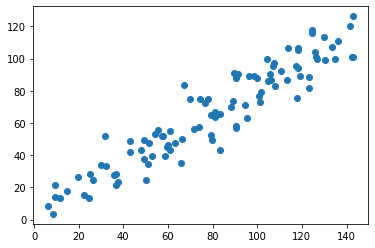

In [92]:
plt.scatter(X,Y)

In [93]:
def mse(N,Y,Y_hat):
  return (1/N)*sum(Y-Y_hat)**2

In [94]:
def gradient_descent_fit(m,c,N,L):
  epoch_error_list=[]
  epoch_count_list=[]
  for i in range(epoch):
    Y_hat = m*X+c
    
    
    epoch_count_list=epoch_count_list[:]
    epoch_count_list.append(i)
    epoch_error=mse(N,Y,Y_hat)
    
    epoch_error_list=epoch_error_list[:]
    epoch_error_list.append(epoch_error)

   
    D_m=(-2/N)*sum(X*(Y-Y_hat))
    
    D_c=(-2/N)*sum(Y-Y_hat)
    
   
    m=m-(L * D_m)
   
    c=c-(L * D_c)
  
  print(" m is: ",m," and  c is: ",c)
  return Y_hat,epoch_count_list,epoch_error_list


In [95]:

returned_params=gradient_descent_fit(m,c,N,L)
y_predicted=returned_params[0]
total_epochs=returned_params[1]
all_epoch_errors=returned_params[2]

 m is:  0.8152152663699133  and  c is:  0.002540993759050743


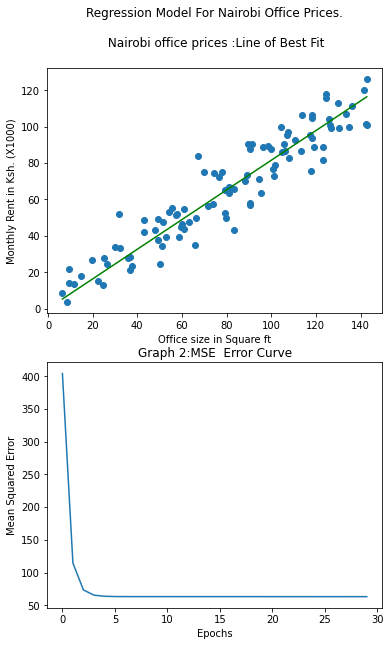

In [96]:

fig,(ax1,ax2)=plt.subplots(2,gridspec_kw={'top':2})
ax1.set(xlabel="Office size in Square ft")
ax1.set(ylabel="Monthly Rent in Ksh. (X1000)")
ax1.set_title("Regression Model For Nairobi Office Prices.\n\n Nairobi office prices :Line of Best Fit\n")
ax1.scatter(X,Y)

ax1.plot([min(X),max(X)],[min(y_predicted),max(y_predicted)],color='green')
ax2.set_title("Graph 2:MSE  Error Curve")
ax2.set(xlabel="Epochs")
ax2.set(ylabel="Mean Squared Error")
ax2.plot(total_epochs,all_epoch_errors)


epoch_count_list.clear()
epoch_error_list.clear()

Prediction of office price when size is 100 square feet

In [97]:
def predict(self,m, c,noise):
    y_predict = noise * m + c
    return y_predict

In [98]:
size = 100
price = m * size + c
price 

80.0